In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix


In [85]:
url_tc = "data/Titanic_Cleaned.csv"

In [86]:
df_tc = pd.read_csv(url_tc)
df_tc.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [87]:
df_train = df_tc[df_tc["Survived"].notna()]
df_train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [88]:
df_train.to_csv("data/Titanic_Train.csv", index=False)

In [89]:
df_test = df_tc[df_tc["Survived"].isna()]
df_test.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
891,892,NaN,3,0,0,False,2,0,True,True,False,False,True,False,False
892,893,NaN,3,1,0,False,3,0,False,False,True,False,False,True,False
893,894,NaN,2,0,0,False,3,1,True,True,False,False,True,False,False
894,895,NaN,3,0,0,False,1,1,True,False,True,False,True,False,False
895,896,NaN,3,1,1,False,0,1,False,False,True,False,False,True,False


In [90]:
df_test.to_csv("data/Titanic_Test.csv", index=False)

In [91]:
df_train.loc[:, "TravelAlone"] = np.where((df_train["SibSp"] + df_train["Parch"]) > 0, 0, 1)
df_train.drop(columns=["SibSp", "Parch"], inplace=True)
df_train.head()

C:\Users\henri\AppData\Local\Temp\ipykernel_10588\2024555923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, "TravelAlone"] = np.where((df_train["SibSp"] + df_train["Parch"]) > 0, 0, 1)
C:\Users\henri\AppData\Local\Temp\ipykernel_10588\2024555923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=["SibSp", "Parch"], inplace=True)


,PassengerId,Survived,Pclass,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,TravelAlone
0,1,0.0,3,False,0,0,True,False,True,False,True,False,False,0
1,2,1.0,1,True,3,3,False,False,False,False,False,True,False,0
2,3,1.0,3,False,1,1,False,False,True,True,False,False,False,1
3,4,1.0,1,True,2,3,False,False,True,False,False,True,False,0
4,5,0.0,3,False,2,1,True,False,True,False,True,False,False,1


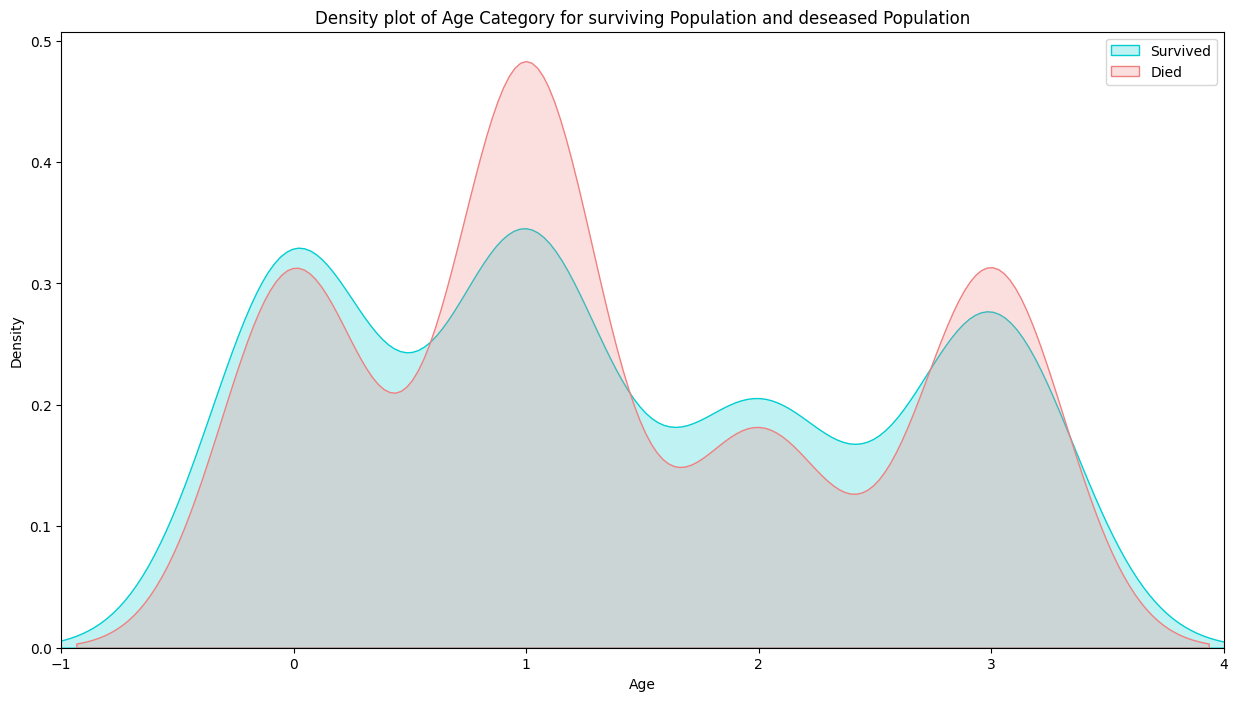

In [92]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1],
                 color = "darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0],
            color = "lightcoral", fill=True)
plt.legend(["Survived", "Died"])
plt.title("Density plot of Age Category for surviving Population and deseased Population")
ax.set(xlabel="Age")
plt.xlim(-1,4)
plt.show()

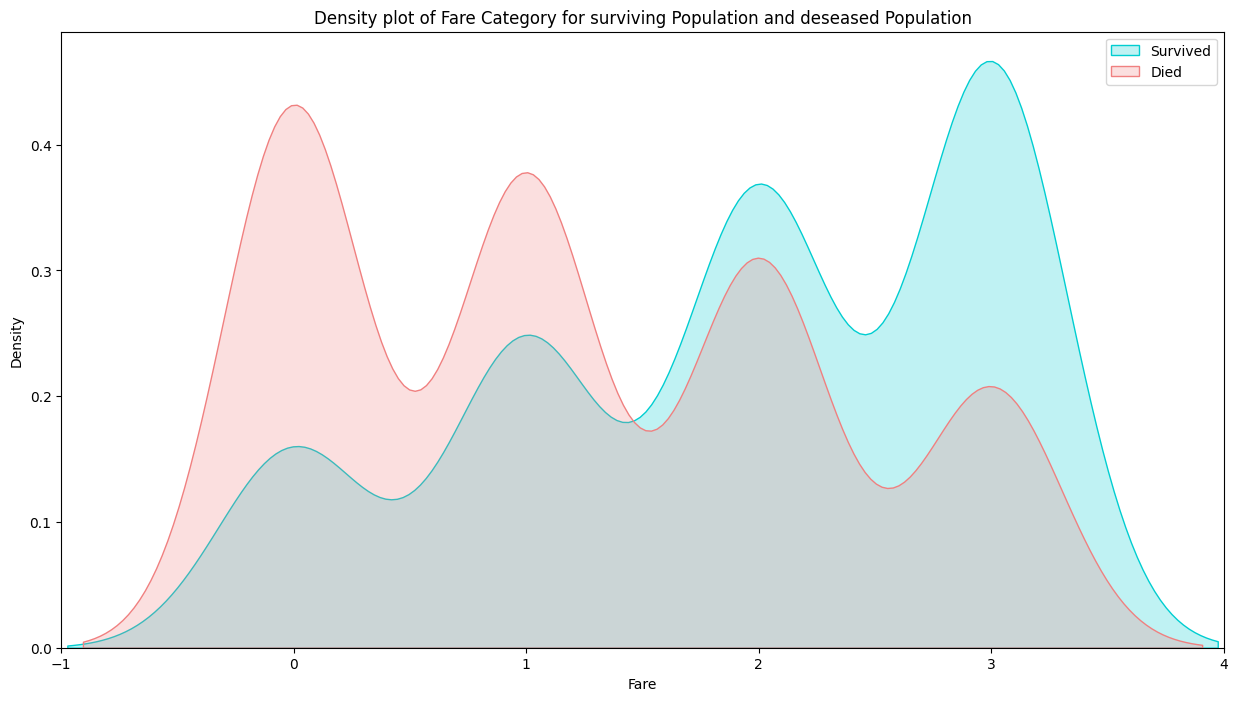

In [93]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1],
                 color = "darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0],
            color = "lightcoral", fill=True)
plt.legend(["Survived", "Died"])
plt.title("Density plot of Fare Category for surviving Population and deseased Population")
ax.set(xlabel="Fare")
plt.xlim(-1,4)
plt.show()

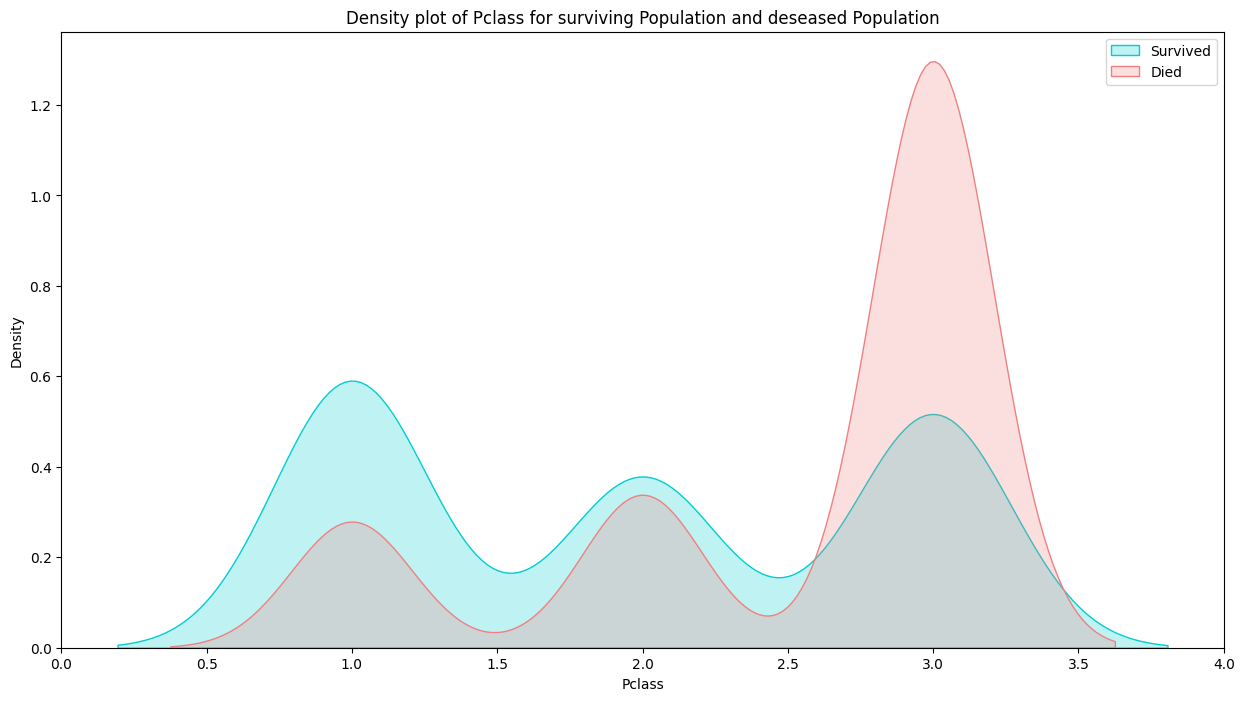

In [97]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1],
                 color = "darkturquoise", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0],
            color = "lightcoral", fill=True)
plt.legend(["Survived", "Died"])
plt.title("Density plot of Pclass for surviving Population and deseased Population")
ax.set(xlabel="Pclass")
plt.xlim(0,4)
plt.show()

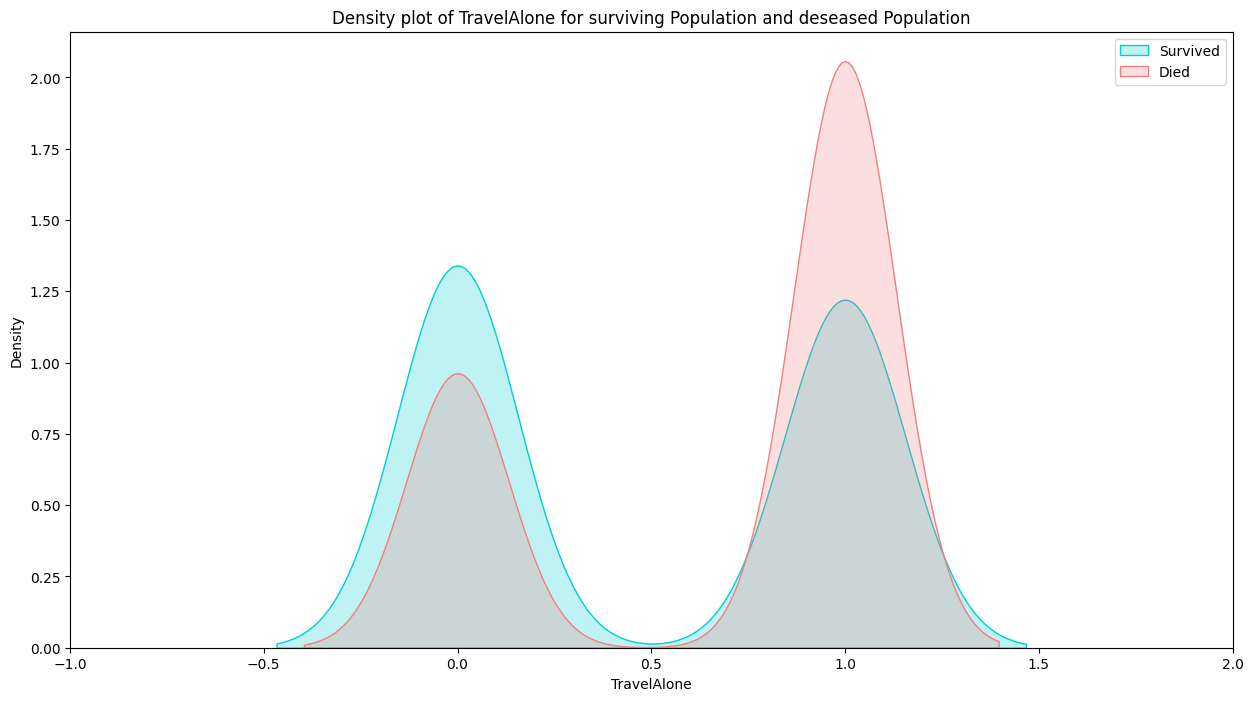

In [96]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1],
                 color = "darkturquoise", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0],
            color = "lightcoral", fill=True)
plt.legend(["Survived", "Died"])
plt.title("Density plot of TravelAlone for surviving Population and deseased Population")
ax.set(xlabel="TravelAlone")
plt.xlim(-1,2)
plt.show()

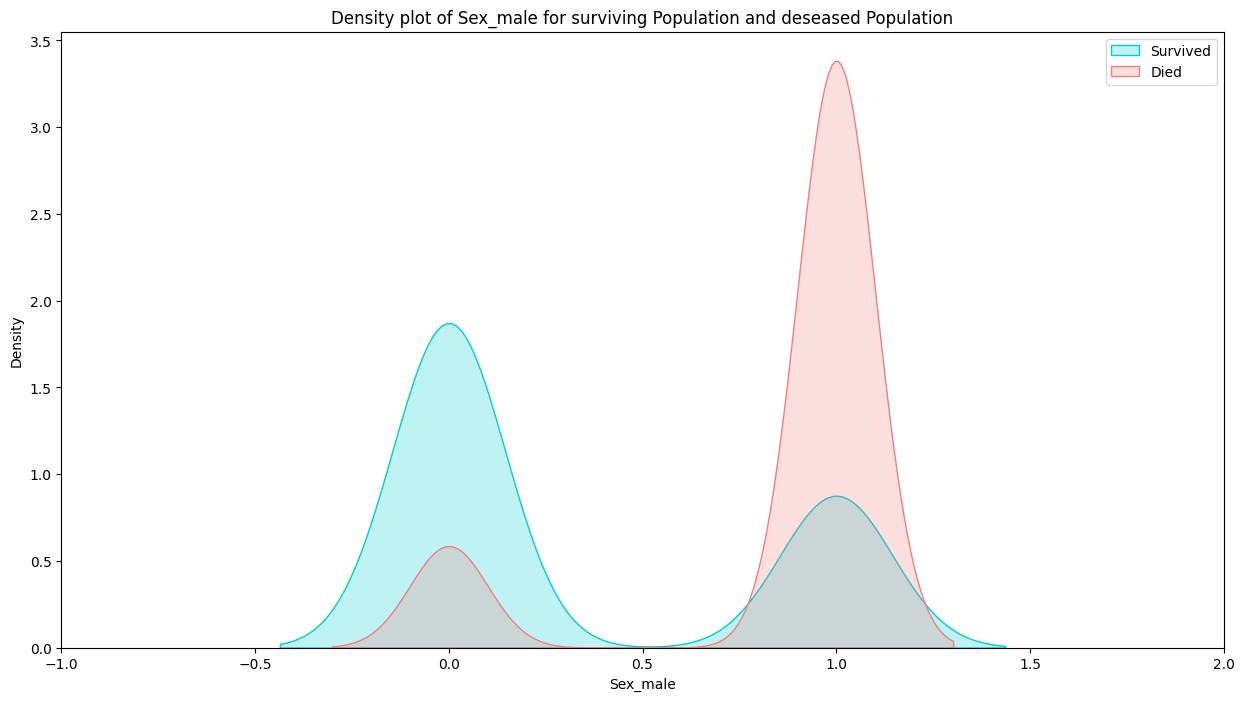

In [98]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1],
                 color = "darkturquoise", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0],
            color = "lightcoral", fill=True)
plt.legend(["Survived", "Died"])
plt.title("Density plot of Sex_male for surviving Population and deseased Population")
ax.set(xlabel="Sex_male")
plt.xlim(-1,2)
plt.show()

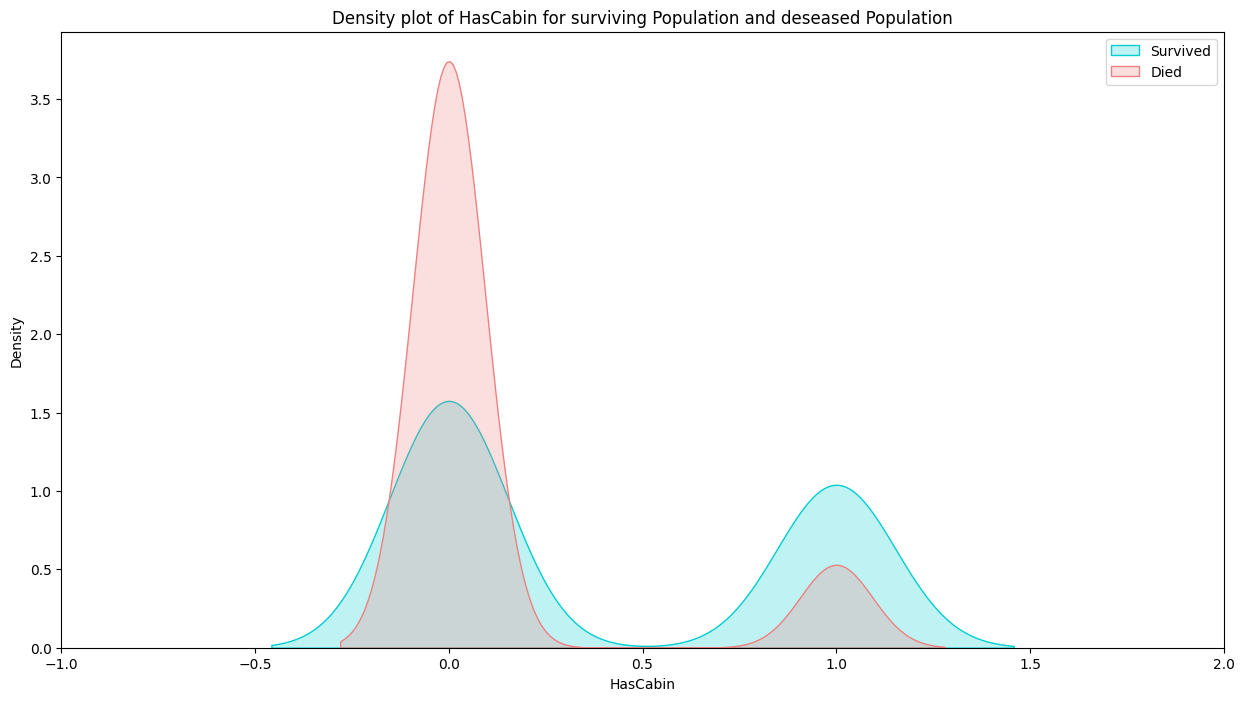

In [99]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["HasCabin"][df_train.Survived == 1],
                 color = "darkturquoise", fill=True)
sns.kdeplot(df_train["HasCabin"][df_train.Survived == 0],
            color = "lightcoral", fill=True)
plt.legend(["Survived", "Died"])
plt.title("Density plot of HasCabin for surviving Population and deseased Population")
ax.set(xlabel="HasCabin")
plt.xlim(-1,2)
plt.show()

In [100]:
correlation_matrix = df_train.corr()

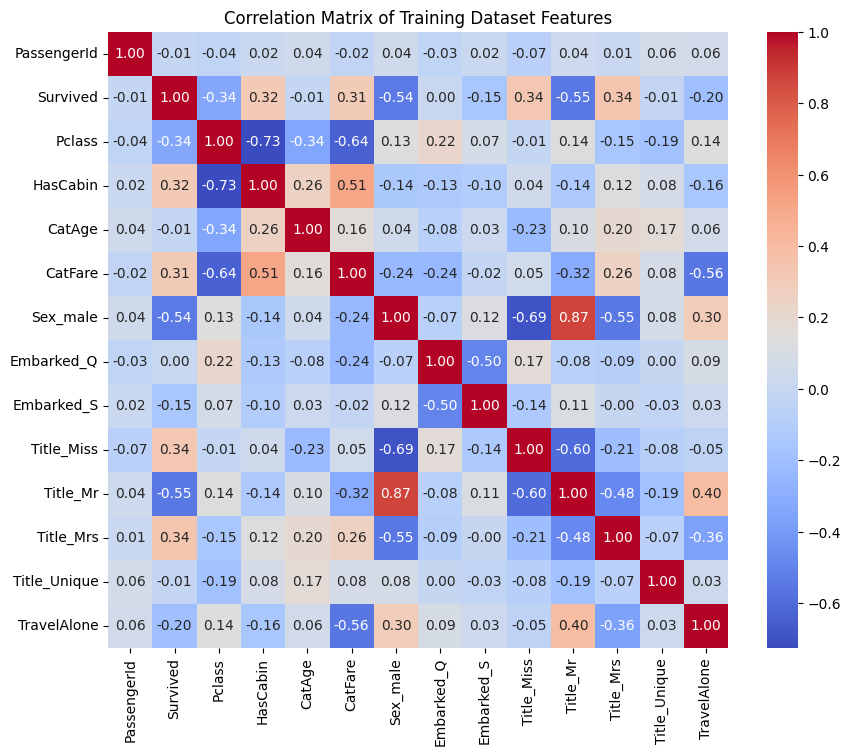

In [101]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",
fmt=".2f")
plt.title("Correlation Matrix of Training Dataset Features")
plt.show()